In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [40]:
data = pd.read_excel(io='data.xlsx',
                    engine='openpyxl',
                    sheet_name=['1', '2', '3', '4', '5', '6'])
data

{'1':          Дата      Сумма
 0  2011-06-14   9 381,00
 1  2011-07-22   4 780,00
 2  2011-08-09   2 300,50
 3  2011-08-25   4 780,00
 4  2011-11-11   7 080,50
 5  2011-11-30  14 161,00
 6  2011-12-26  32 200,00
 7  2011-12-26   4 550,00
 8  2012-01-17  13 575,00
 9  2012-02-21   5 500,00
 10 2012-03-26  16 150,00
 11 2012-03-28  16 050,00
 12 2012-03-28  16 150,00
 13 2012-04-10   9 770,00
 14 2012-05-18  16 150,00
 15 2012-06-14  32 300,00
 16 2012-06-18  32 300,00
 17 2012-07-16  32 300,00
 18 2012-07-24  32 300,00
 19 2012-08-08  48 450,00
 20 2012-08-28   3 600,00
 21 2012-09-11  32 300,00
 22 2012-09-21   1 200,00
 23 2012-09-21  32 300,00
 24 2012-10-16  40 375,00
 25 2012-10-19   1 800,00
 26 2012-11-22  32 300,00
 27 2012-12-03   1 800,00
 28 2012-12-12  32 300,00
 29 2013-01-25   3 840,00
 30 2013-02-19   7 200,00
 31 2013-02-25  28 475,00
 32 2013-03-18   3 825,00
 33 2013-03-18   3 820,00
 34 2013-04-29  24 125,00
 35 2013-04-29   8 500,00
 36 2013-05-15   7 080,00
 37 201

In [41]:
dfs = {sheet_name: data[sheet_name] for sheet_name in data.keys()}

df1 = dfs['1']
df2 = dfs['2']
df3 = dfs['3']
df4 = dfs['4']
df5 = dfs['5']
df6 = dfs['6']

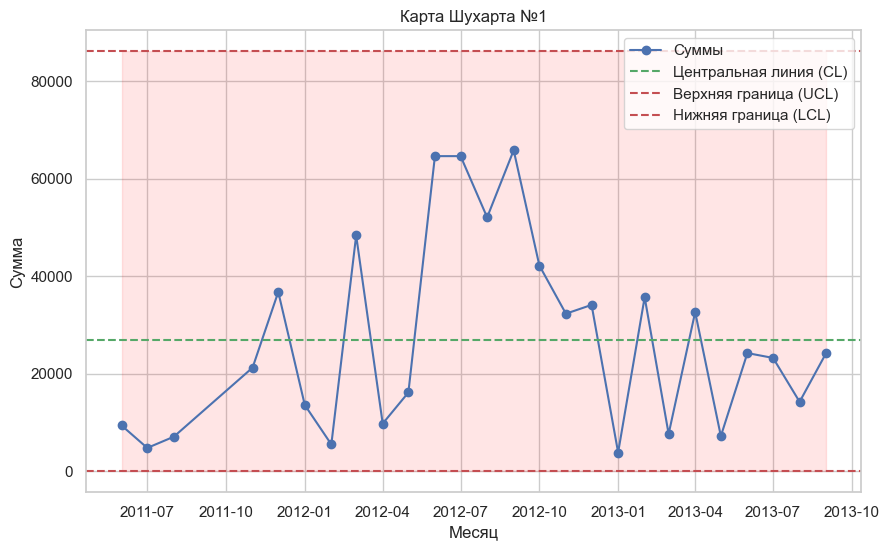

In [42]:
df1['Сумма'] = df1['Сумма'].str.replace(' ', '').str.replace(',', '.').astype(float)
df1.loc[37, 'Сумма'] = 120.0
df1 = df1.dropna()

if df1['Дата'].duplicated:
    df1['Дата'] = df1['Дата'] + pd.to_timedelta(range(len(df1)), unit='h')

df1['Месяц'] = df1['Дата'].dt.to_period('M').apply(lambda r: r.start_time)
gropped_df1 = df1.groupby('Месяц')['Сумма'].sum().reset_index()

mean_value = gropped_df1['Сумма'].mean()
std_dev = gropped_df1['Сумма'].std()

CL = mean_value
UCL = CL + 3 * std_dev
LCL = max(0, CL - 3 * std_dev)

sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
plt.plot(gropped_df1['Месяц'], gropped_df1['Сумма'], marker='o', linestyle='-', color='b', label='Суммы')

plt.axhline(y=CL, color='g', linestyle='--', label='Центральная линия (CL)')
plt.axhline(y=UCL, color='r', linestyle='--', label='Верхняя граница (UCL)')
plt.axhline(y=LCL, color='r', linestyle='--', label='Нижняя граница (LCL)')

plt.fill_between(gropped_df1['Месяц'], LCL, UCL, color='red', alpha=0.1)
plt.title('Карта Шухарта №1')
plt.xlabel('Месяц')
plt.ylabel('Сумма')
plt.legend(loc='best')
plt.savefig('D:/NLP/notebooks/graphics/schuhart_map1.png')
plt.show()

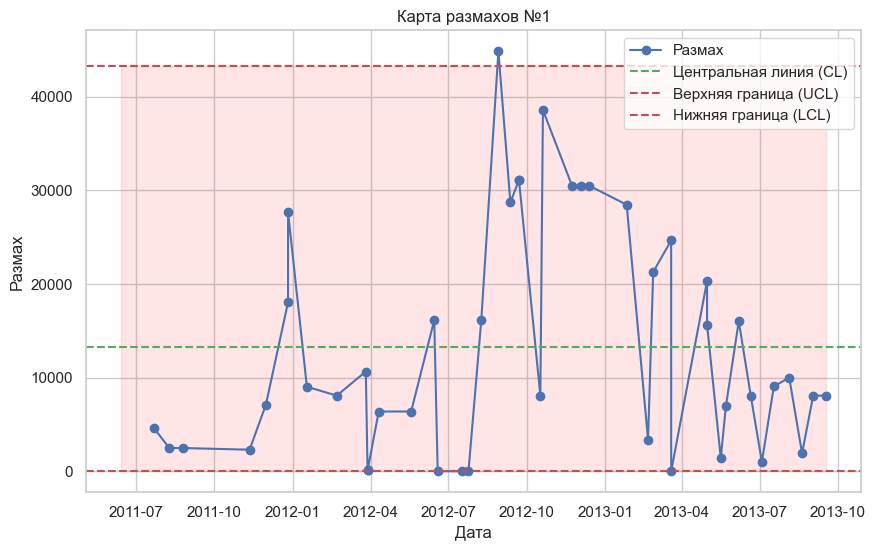

In [43]:
df1['Размах'] = df1['Сумма'].diff().abs()
mean_r = df1['Размах'].mean()

CL = mean_r
UCL = 3.267 * mean_r
LCL = 0 * mean_r

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
plt.plot(df1['Дата'], df1['Размах'], marker='o', linestyle='-', color='b', label='Размах')
plt.axhline(y=CL, color='g', linestyle='--', label='Центральная линия (CL)')
plt.axhline(y=UCL, color='r', linestyle='--', label='Верхняя граница (UCL)')
plt.axhline(y=LCL, color='r', linestyle='--', label='Нижняя граница (LCL)')

plt.fill_between(df1['Дата'], LCL, UCL, color='red', alpha=0.1)
plt.title('Карта размахов №1')
plt.xlabel('Дата')
plt.ylabel('Размах')
plt.legend(loc='best')
plt.savefig('D:/NLP/notebooks/graphics/scope_map1.png')
plt.show()

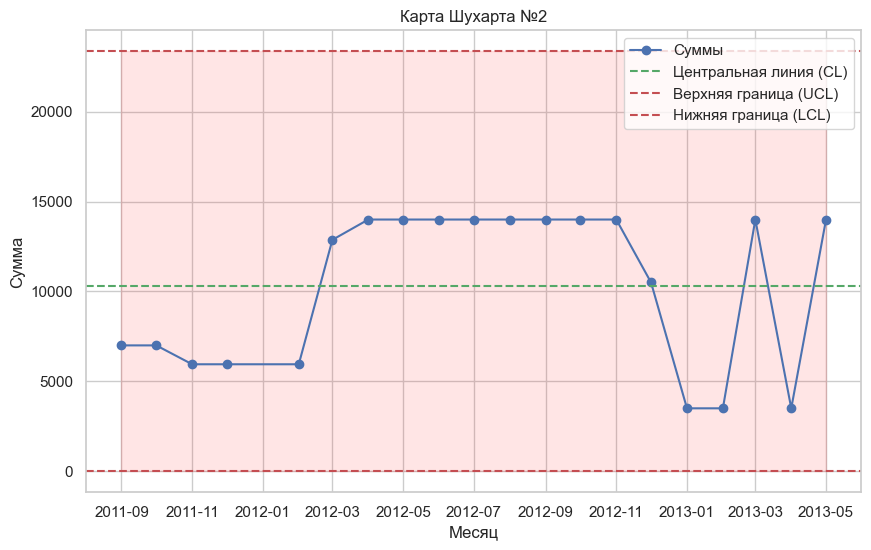

In [17]:
df2['Сумма'] = df2['Сумма'].str.replace(' ', '').str.replace(',', '.').astype(float)
df2 = df2.dropna()

if df2['Дата'].duplicated:
    df2['Дата'] = df2['Дата'] + pd.to_timedelta(range(len(df2)), unit='h')

df2['Месяц'] = df2['Дата'].dt.to_period('M').apply(lambda r: r.start_time)
gropped_df2 = df2.groupby('Месяц')['Сумма'].sum().reset_index()

mean_value = gropped_df2['Сумма'].mean()
std_dev = gropped_df2['Сумма'].std()

CL = mean_value
UCL = CL + 3 * std_dev
LCL = max(0, CL - 3 * std_dev)


sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
plt.plot(gropped_df2['Месяц'], gropped_df2['Сумма'], marker='o', linestyle='-', color='b', label='Суммы')

plt.axhline(y=CL, color='g', linestyle='--', label='Центральная линия (CL)')
plt.axhline(y=UCL, color='r', linestyle='--', label='Верхняя граница (UCL)')
plt.axhline(y=LCL, color='r', linestyle='--', label='Нижняя граница (LCL)')

plt.fill_between(gropped_df2['Месяц'], LCL, UCL, color='red', alpha=0.1)
plt.title('Карта Шухарта №2')
plt.xlabel('Месяц')
plt.ylabel('Сумма')
plt.legend(loc='best')
plt.savefig('D:/NLP/notebooks/graphics/schuhart_map2.png')
plt.show()

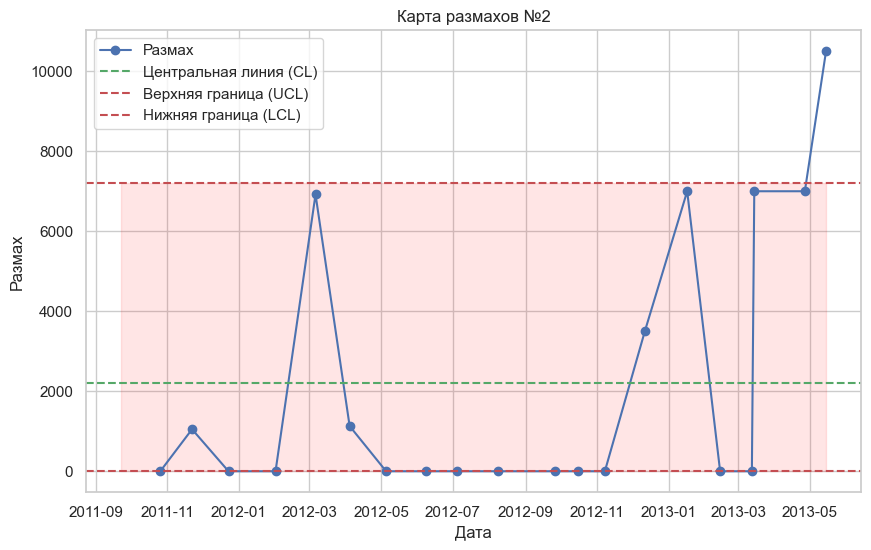

In [18]:
df2['Размах'] = df2['Сумма'].diff().abs()

mean_r = df2['Размах'].mean()

CL = mean_r
UCL = 3.267 * mean_r
LCL = 0 * mean_r

plt.figure(figsize=(10, 6))
plt.plot(df2['Дата'], df2['Размах'], marker='o', linestyle='-', color='b', label='Размах')

plt.axhline(y=CL, color='g', linestyle='--', label='Центральная линия (CL)')
plt.axhline(y=UCL, color='r', linestyle='--', label='Верхняя граница (UCL)')
plt.axhline(y=LCL, color='r', linestyle='--', label='Нижняя граница (LCL)')

plt.fill_between(df2['Дата'], LCL, UCL, color='red', alpha=0.1)
plt.title('Карта размахов №2')
plt.xlabel('Дата')
plt.ylabel('Размах')
plt.legend(loc='best')
plt.savefig('D:/NLP/notebooks/graphics/scope_map2.png')
plt.show()

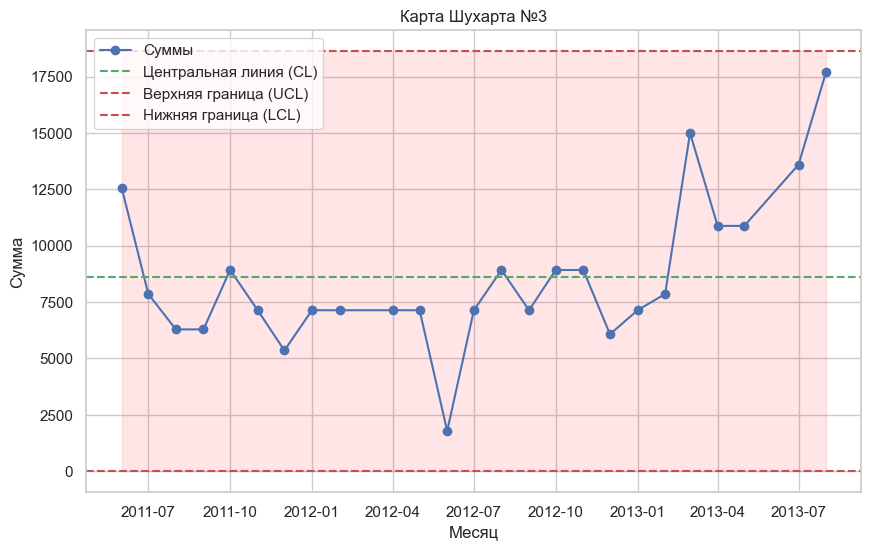

In [19]:
df3['Сумма'] = df3['Сумма'].str.replace(' ', '').str.replace(',', '.').astype(float)
df3 = df3.dropna()

if df3['Дата'].duplicated:
    df3['Дата'] = df3['Дата'] + pd.to_timedelta(range(len(df3)), unit='h')

df3['Месяц'] = df3['Дата'].dt.to_period('M').apply(lambda r: r.start_time)
gropped_df3 = df3.groupby('Месяц')['Сумма'].sum().reset_index()

mean_value = gropped_df3['Сумма'].mean()
std_dev = gropped_df3['Сумма'].std()

CL = mean_value
UCL = CL + 3 * std_dev
LCL = max(0, CL - 3 * std_dev)

sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
plt.plot(gropped_df3['Месяц'], gropped_df3['Сумма'], marker='o', linestyle='-', color='b', label='Суммы')

plt.axhline(y=CL, color='g', linestyle='--', label='Центральная линия (CL)')
plt.axhline(y=UCL, color='r', linestyle='--', label='Верхняя граница (UCL)')
plt.axhline(y=LCL, color='r', linestyle='--', label='Нижняя граница (LCL)')

plt.fill_between(gropped_df3['Месяц'], LCL, UCL, color='red', alpha=0.1)
plt.title('Карта Шухарта №3')
plt.xlabel('Месяц')
plt.ylabel('Сумма')
plt.legend(loc='best')
plt.savefig('D:/NLP/notebooks/graphics/schuhart_map3.png')
plt.show()

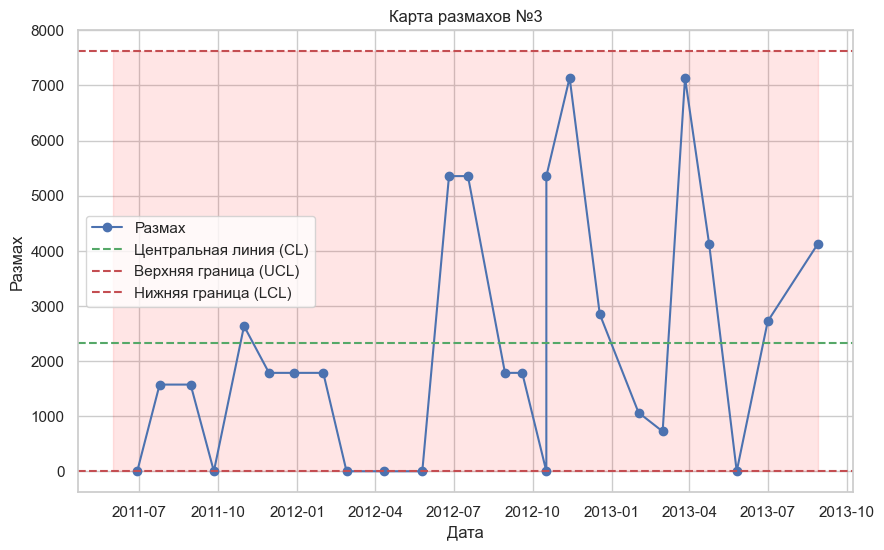

In [20]:
df3['Размах'] = df3['Сумма'].diff().abs()

mean_r = df3['Размах'].mean()

CL = mean_r
UCL = 3.267 * mean_r
LCL = 0 * mean_r

plt.figure(figsize=(10, 6))
plt.plot(df3['Дата'], df3['Размах'], marker='o', linestyle='-', color='b', label='Размах')

plt.axhline(y=CL, color='g', linestyle='--', label='Центральная линия (CL)')
plt.axhline(y=UCL, color='r', linestyle='--', label='Верхняя граница (UCL)')
plt.axhline(y=LCL, color='r', linestyle='--', label='Нижняя граница (LCL)')

plt.fill_between(df3['Дата'], LCL, UCL, color='red', alpha=0.1)
plt.title('Карта размахов №3')
plt.xlabel('Дата')
plt.ylabel('Размах')
plt.legend(loc='best')
plt.savefig('D:/NLP/notebooks/graphics/scope_map3.png')
plt.show()

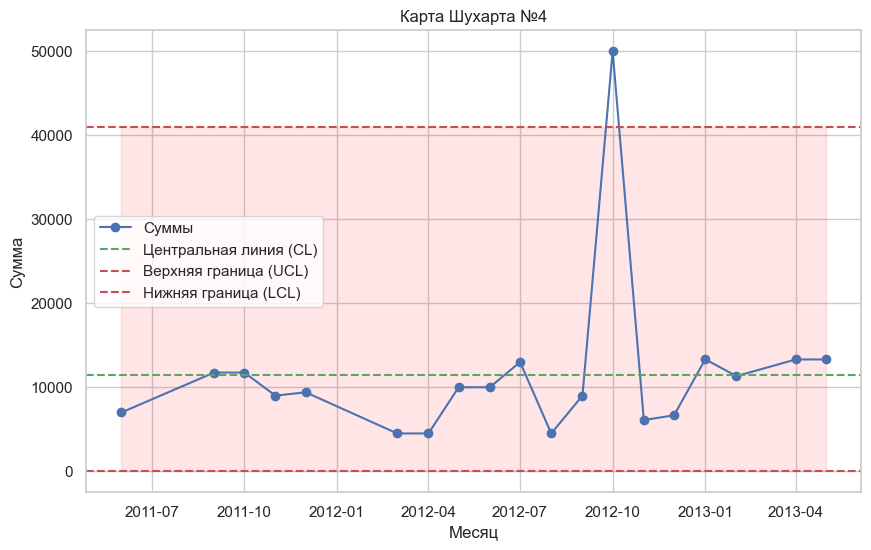

In [21]:
df4['Дата'], df4['Сумма'] = df4['Сумма'], df4['Дата']

df4['Сумма'] = df4['Сумма'].str.replace(' ', '').str.replace(',', '.').astype(float)
df4 = df4.dropna()

if df4['Дата'].duplicated:
    df4['Дата'] = df4['Дата'] + pd.to_timedelta(range(len(df4)), unit='h')

df4['Месяц'] = df4['Дата'].dt.to_period('M').apply(lambda r: r.start_time)
gropped_df4 = df4.groupby('Месяц')['Сумма'].sum().reset_index()

mean_value = gropped_df4['Сумма'].mean()
std_dev = gropped_df4['Сумма'].std()

CL = mean_value
UCL = CL + 3 * std_dev
LCL = max(0, CL - 3 * std_dev)

sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
plt.plot(gropped_df4['Месяц'], gropped_df4['Сумма'], marker='o', linestyle='-', color='b', label='Суммы')

plt.axhline(y=CL, color='g', linestyle='--', label='Центральная линия (CL)')
plt.axhline(y=UCL, color='r', linestyle='--', label='Верхняя граница (UCL)')
plt.axhline(y=LCL, color='r', linestyle='--', label='Нижняя граница (LCL)')

plt.fill_between(gropped_df4['Месяц'], LCL, UCL, color='red', alpha=0.1)
plt.title('Карта Шухарта №4')
plt.xlabel('Месяц')
plt.ylabel('Сумма')
plt.legend(loc='best')
plt.savefig('D:/NLP/notebooks/graphics/schuhart_map4.png')
plt.show()

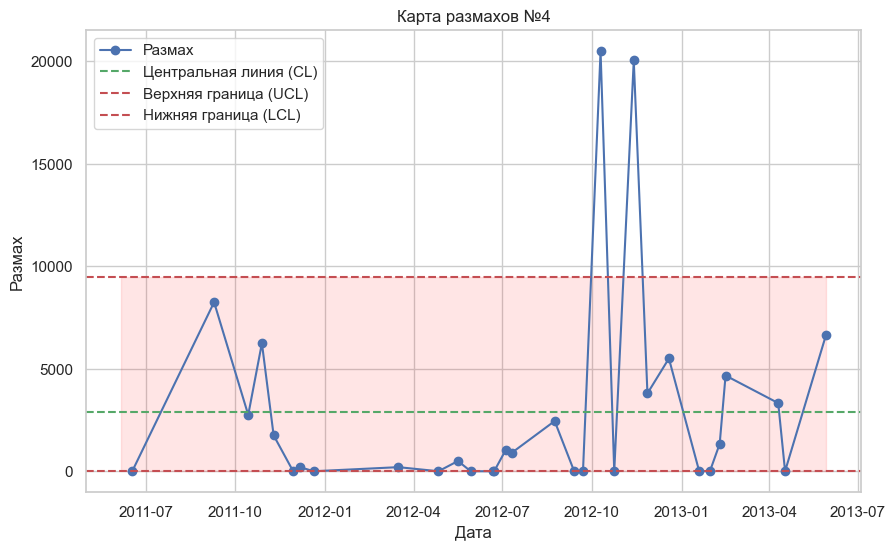

In [22]:
df4['Размах'] = df4['Сумма'].diff().abs()

mean_r = df4['Размах'].mean()

CL = mean_r
UCL = 3.267 * mean_r
LCL = 0 * mean_r

plt.figure(figsize=(10, 6))
plt.plot(df4['Дата'], df4['Размах'], marker='o', linestyle='-', color='b', label='Размах')

plt.axhline(y=CL, color='g', linestyle='--', label='Центральная линия (CL)')
plt.axhline(y=UCL, color='r', linestyle='--', label='Верхняя граница (UCL)')
plt.axhline(y=LCL, color='r', linestyle='--', label='Нижняя граница (LCL)')

plt.fill_between(df4['Дата'], LCL, UCL, color='red', alpha=0.1)
plt.title('Карта размахов №4')
plt.xlabel('Дата')
plt.ylabel('Размах')
plt.legend(loc='best')
plt.savefig('D:/NLP/notebooks/graphics/scope_map4.png')
plt.show()

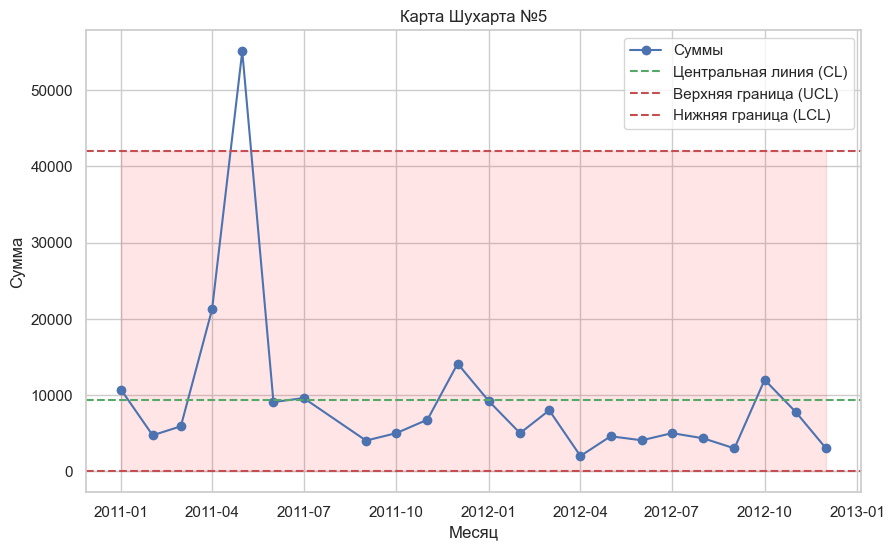

In [23]:
df5 = df5.copy()

df5.loc[:, 'Дата'] = df5['Дата'] + pd.to_timedelta(range(len(df5)), unit='ms')

df5.loc[:, 'Месяц'] = df5['Дата'].dt.to_period('M').apply(lambda r: r.start_time)

df5['Сумма'] = df5['Сумма'].str.replace(' ', '').str.replace(',', '.').astype(float)
df5 = df5.dropna()

if df5['Дата'].duplicated().any():
    df5.loc[:, 'Дата'] = df5['Дата'] + pd.to_timedelta(range(len(df5)), unit='ms')

df5.loc[:, 'Месяц'] = df5['Дата'].dt.to_period('M').apply(lambda r: r.start_time)

gropped_df5 = df5.groupby('Месяц')['Сумма'].sum().reset_index()

mean_value = gropped_df5['Сумма'].mean()
std_dev = gropped_df5['Сумма'].std()

CL = mean_value
UCL = CL + 3 * std_dev
LCL = max(0, CL - 3 * std_dev)

sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
plt.plot(gropped_df5['Месяц'], gropped_df5['Сумма'], marker='o', linestyle='-', color='b', label='Суммы')

plt.axhline(y=CL, color='g', linestyle='--', label='Центральная линия (CL)')
plt.axhline(y=UCL, color='r', linestyle='--', label='Верхняя граница (UCL)')
plt.axhline(y=LCL, color='r', linestyle='--', label='Нижняя граница (LCL)')

plt.fill_between(gropped_df5['Месяц'], LCL, UCL, color='red', alpha=0.1)
plt.title('Карта Шухарта №5')
plt.xlabel('Месяц')
plt.ylabel('Сумма')
plt.legend(loc='best')
plt.savefig('D:/NLP/notebooks/graphics/schuhart_map5.png')
plt.show()

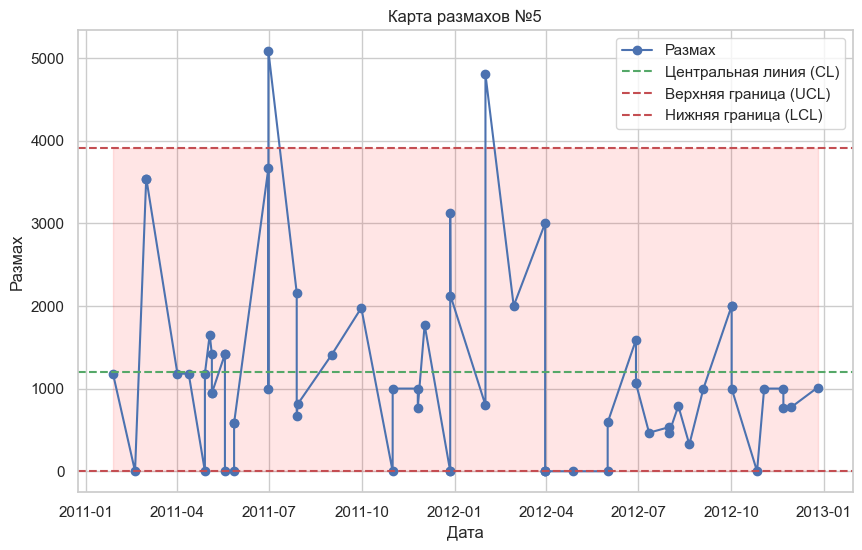

In [24]:
df5 = df5.copy()

df5.loc[:, 'Размах'] = df5['Сумма'].diff().abs()

mean_r = df5['Размах'].mean()

CL = mean_r
UCL = 3.267 * mean_r
LCL = 0 * mean_r

plt.figure(figsize=(10, 6))
plt.plot(df5['Дата'], df5['Размах'], marker='o', linestyle='-', color='b', label='Размах')

plt.axhline(y=CL, color='g', linestyle='--', label='Центральная линия (CL)')
plt.axhline(y=UCL, color='r', linestyle='--', label='Верхняя граница (UCL)')
plt.axhline(y=LCL, color='r', linestyle='--', label='Нижняя граница (LCL)')

plt.fill_between(df5['Дата'], LCL, UCL, color='red', alpha=0.1)
plt.title('Карта размахов №5')
plt.xlabel('Дата')
plt.ylabel('Размах')
plt.legend(loc='best')
plt.savefig('D:/NLP/notebooks/graphics/scope_map5.png')
plt.show()

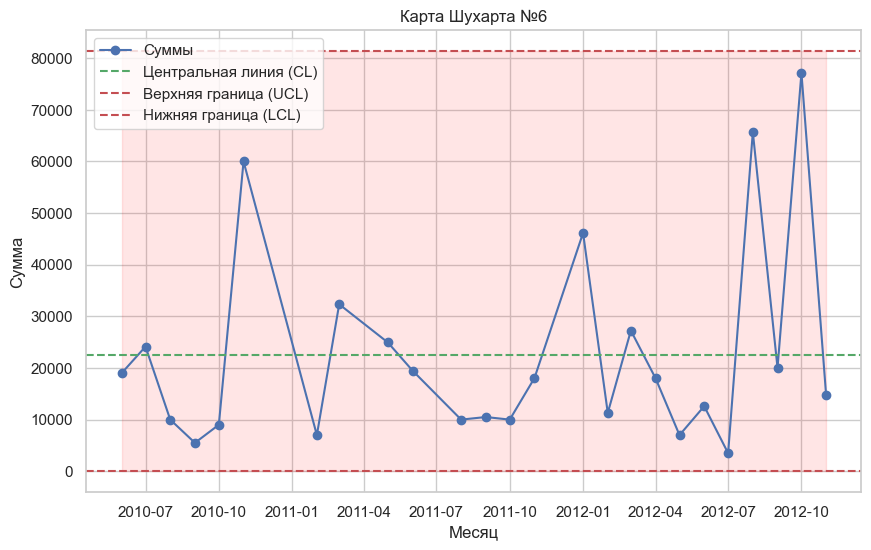

In [25]:
df6 = df6.copy()
df6.loc[:, 'Дата'] = df6['Дата'] + pd.to_timedelta(range(len(df6)), unit='h')
df6.loc[:, 'Месяц'] = df6['Дата'].dt.to_period('M').apply(lambda r: r.start_time)
df6['Сумма'] = df6['Сумма'].str.replace(' ', '').str.replace(',', '.').astype(float)
df6 = df6.dropna()

if df6['Дата'].duplicated().any():
    df6.loc[:, 'Дата'] = df6['Дата'] + pd.to_timedelta(range(len(df6)), unit='h')

df6.loc[:, 'Месяц'] = df6['Дата'].dt.to_period('M').apply(lambda r: r.start_time)

gropped_df6 = df6.groupby('Месяц')['Сумма'].sum().reset_index()

mean_value = gropped_df6['Сумма'].mean()
std_dev = gropped_df6['Сумма'].std()

CL = mean_value
UCL = CL + 3 * std_dev
LCL = max(0, CL - 3 * std_dev)

# Визуализация
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
plt.plot(gropped_df6['Месяц'], gropped_df6['Сумма'], marker='o', linestyle='-', color='b', label='Суммы')

plt.axhline(y=CL, color='g', linestyle='--', label='Центральная линия (CL)')
plt.axhline(y=UCL, color='r', linestyle='--', label='Верхняя граница (UCL)')
plt.axhline(y=LCL, color='r', linestyle='--', label='Нижняя граница (LCL)')

plt.fill_between(gropped_df6['Месяц'], LCL, UCL, color='red', alpha=0.1)
plt.title('Карта Шухарта №6')
plt.xlabel('Месяц')
plt.ylabel('Сумма')
plt.legend(loc='best')
plt.savefig('D:/NLP/notebooks/graphics/schuhart_map6.png')
plt.show()

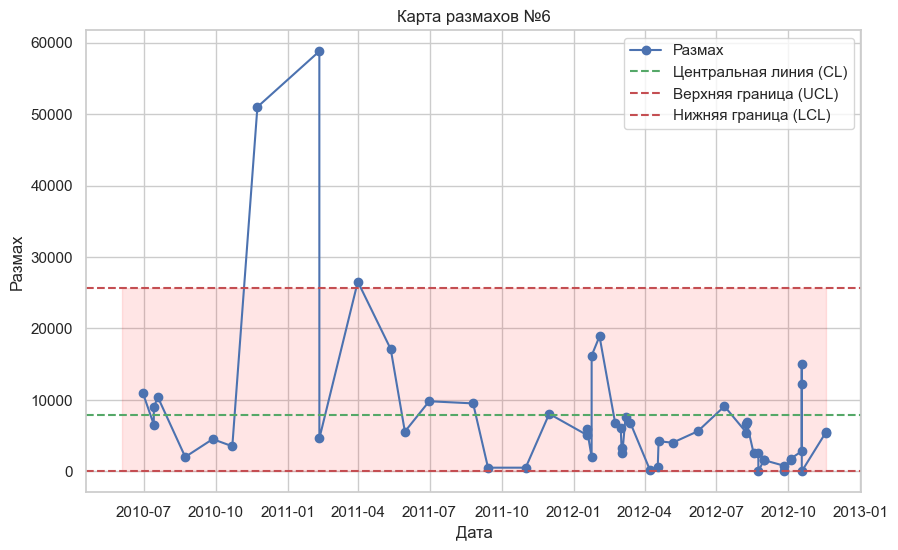

In [26]:
df6 = df6.copy()
df6.loc[:, 'Размах'] = df6['Сумма'].diff().abs()

mean_r = df6['Размах'].mean()

CL = mean_r
UCL = 3.267 * mean_r
LCL = 0 * mean_r

plt.figure(figsize=(10, 6))
plt.plot(df6['Дата'], df6['Размах'], marker='o', linestyle='-', color='b', label='Размах')

plt.axhline(y=CL, color='g', linestyle='--', label='Центральная линия (CL)')
plt.axhline(y=UCL, color='r', linestyle='--', label='Верхняя граница (UCL)')
plt.axhline(y=LCL, color='r', linestyle='--', label='Нижняя граница (LCL)')

plt.fill_between(df6['Дата'], LCL, UCL, color='red', alpha=0.1)
plt.title('Карта размахов №6')
plt.xlabel('Дата')
plt.ylabel('Размах')
plt.legend(loc='best')
plt.savefig('D:/NLP/notebooks/graphics/scope_map6.png')
plt.show()

In [27]:
#Заключение: 
#1) из исследуемых процессов можем считать стабильными 1 и 6, они находятся под статистическим контролем поскольку
#процессы находятся в пределах контрольных границ. Остальные можем отнести к нестабильным.

#2) на первом графике индивидуальных значений четко видно изменение процесса после 5 месяца, сохраняющееся до 12. Дальше процесс начинает колебаться 
#около среднего значения. Это может указывать на задержку оплаты клиентом (возможно, из-за операционной ошибки на его стороне или внутренних проблем). 
#Резкое падение может означать, что клиент устранил проблему и внёс все недостающие платежи одновременно. Выравнивание после падения может 
#указывать на возврат к нормальному графику платежей после устранения разовой проблемы. Похожая ситуация и в карте скользящих размахов

#на втором графике наблюдаем перемещение трех точек за пределы среднего, что указывает на смещение процесса. Рост может указывать на 
#кратковременное увеличение платежей от клиента. Это может быть связано с временными причинами, например клиент 
#увеличил объёмы заказов или услуг.

#На третьем графике явно наблюдаются колебания процесса. Такой график может отражать периоды увеличения и снижения активности клиента 
#в разные сезоны. Клиент может адаптироваться к новым партнерским условиям, что приводит к таким колебаниям. Похожая ситуация на четвертом графике.

#Для пятого графика характерна цикличность после резкого пика в начале. Резкий рост может указывать на разовый крупный платёж от клиента, который 
#был выше обычного уровня поступлений. Это может быть закрытие крупного заказа или погашение задолженности или разовая оплата за услуги/товары 
#большими партиями. Возможно, был внесён излишний платёж, который затем был скорректирован, что привело к падению до нормального уровня.
# Это также может быть следствием ошибки в процессе обработки платежей, которая была быстро исправлена.

#Для шестого графика могут быть характерны особенности для пятого графика, но при этом процесс протекает наоборот.

#3) Первого клиента можно отнести как к проблемным, так и к растущим компаниям. Хотя был наблюдаемый рост, но резкое падение говорят о наличии 
#проблем или угроз, которые могут помешать дальнейшему развитию. Поскольку процесс стабилизировался, есть вероятность того, что компания всё 
#ещё может вырасти.

#Вторая компания демонстрирует признаки временного увеличения заказов или платежей, но этого недостаточно для устойчивого роста или долгосрочной 
#лояльности клиентов. Пока что она ближе к категории проблемных компаний, которые могут иметь трудности с удержанием клиентов и поддержанием 
#стабильного роста.

#Третью компанию скорее соответствует характеристикам лояльных компаний. Клиент продолжает сотрудничество, несмотря на колебания, 
#и активно адаптируется к изменениям. Четвертую компанию можно отнести к растищум, поскольку есть явный стабильный рост. 

#Оба графика (пятый и шестой) свидетельствуют о проблемах с устойчивостью и предсказуемостью процессов в компании. Вероятнее всего, 
#данную компанию можно отнести к проблемным.